<a href="https://colab.research.google.com/github/NanaShi929/GBS_Winter_School/blob/day-2/Python_Customer_Behaviour.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# prompt: code to upload excel file

from google.colab import files
uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
# now you can use the uploaded file using its name
# for example if the name of the file is my_excel_file.xlsx
# import pandas as pd
# df = pd.read_excel('my_excel_file.xlsx')
# print(df)


Saving Customer_Behaviour.xlsx to Customer_Behaviour.xlsx
User uploaded file "Customer_Behaviour.xlsx" with length 18566 bytes


Saving Customer_Behaviour.xlsx to Customer_Behaviour (1).xlsx
User uploaded file "Customer_Behaviour (1).xlsx" with length 18566 bytes


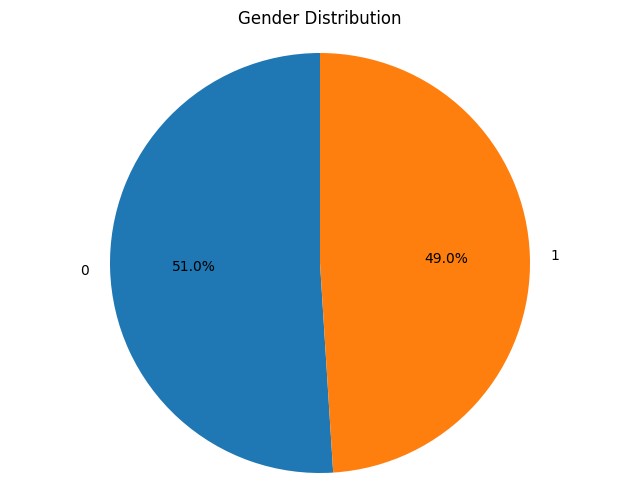

In [2]:
# prompt: code to create pie chart of Gender from excel file

from google.colab import files
import pandas as pd
import matplotlib.pyplot as plt

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

# Assuming the uploaded file is named 'my_excel_file.xlsx' and contains a 'Gender' column
try:
  df = pd.read_excel(list(uploaded.keys())[0]) # Read the first uploaded file
  gender_counts = df['Gender'].value_counts()

  plt.figure(figsize=(8, 6))
  plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90)
  plt.title('Gender Distribution')
  plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
  plt.show()

except KeyError:
  print("Error: 'Gender' column not found in the uploaded file.")
except Exception as e:
  print(f"An error occurred: {e}")

Saving Customer_Behaviour.xlsx to Customer_Behaviour (2).xlsx
User uploaded file "Customer_Behaviour (2).xlsx" with length 18566 bytes
Purchased    0   1
Gender            
0          127  77
1          130  66


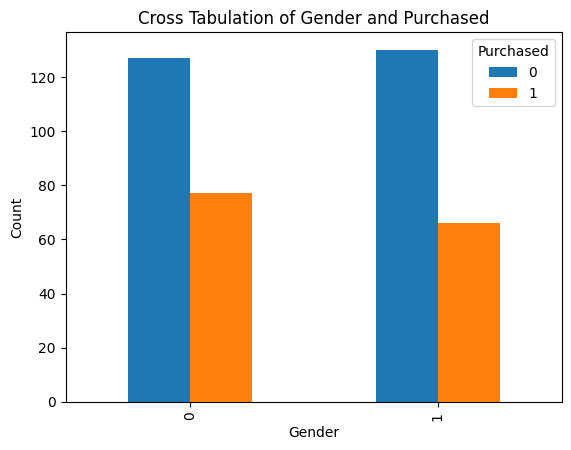

In [3]:
# prompt: code for cross tablulation of Gender and Purchased

from google.colab import files
import pandas as pd
import matplotlib.pyplot as plt

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

try:
  df = pd.read_excel(list(uploaded.keys())[0]) # Read the first uploaded file
  # Create the cross-tabulation
  cross_tab = pd.crosstab(df['Gender'], df['Purchased'])
  print(cross_tab)

  # Visualization (optional)
  cross_tab.plot(kind='bar')
  plt.title('Cross Tabulation of Gender and Purchased')
  plt.xlabel('Gender')
  plt.ylabel('Count')
  plt.show()

except KeyError as e:
  print(f"Error: Column '{e}' not found in the uploaded file.")
except Exception as e:
  print(f"An error occurred: {e}")

In [4]:
# prompt: code for cross tablulation of Gender and EstimatedSalary

import pandas as pd

try:
  # Assuming 'df' is already defined from a previous cell
  # If not, replace this with your data loading code
  # Example: df = pd.read_csv('your_file.csv')
  cross_tab = pd.crosstab(df['Gender'], df['EstimatedSalary'])
  print(cross_tab)

except KeyError as e:
  print(f"Error: Column '{e}' not found in the DataFrame.")
except NameError:
  print("Error: DataFrame 'df' not found. Please load your data first.")
except Exception as e:
  print(f"An error occurred: {e}")

EstimatedSalary  15000   16000   17000   18000   19000   20000   21000   \
Gender                                                                    
0                     2       1       2       0       0       1       2   
1                     2       1       1       4       2       4       0   

EstimatedSalary  22000   23000   25000   ...  139000  141000  142000  143000  \
Gender                                   ...                                   
0                     2       3       2  ...       1       1       1       1   
1                     3       4       2  ...       0       1       0       1   

EstimatedSalary  144000  146000  147000  148000  149000  150000  
Gender                                                           
0                     1       2       1       0       1       1  
1                     3       0       0       1       1       1  

[2 rows x 117 columns]


In [12]:
# prompt: code to create excel file of summary statistics with mean,medium,mode,std devivation ,JB stat,JB P-value,skwiness,kurtosis,obervation

from google.colab import files
import pandas as pd
import numpy as np
from scipy.stats import skew, kurtosis, jarque_bera

uploaded = files.upload()
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

# Now you can use pandas to read the excel file
try:
  df = pd.read_excel(fn)
except FileNotFoundError:
  print(f"Error: File '{fn}' not found. Please upload the correct file.")
  exit() # Exit the script if the file is not found

# Calculate summary statistics
summary_stats = {}

for col in df.select_dtypes(include=np.number): #Only consider numerical columns
  if df[col].dropna().empty:  # Skip empty columns after dropping NA
    continue

  summary_stats[col] = {
      'Mean': df[col].mean(),
      'Median': df[col].median(),
      'Mode': df[col].mode().iloc[0] if not df[col].mode().empty else 'No Mode', #Handle cases with no unique mode
      'Std. Dev': df[col].std(),
      'Observations': len(df[col].dropna()), # Count non-missing values
      'Skewness': skew(df[col].dropna()),
      'Kurtosis': kurtosis(df[col].dropna()),
  }

  jb_stat, jb_pval = jarque_bera(df[col].dropna())
  summary_stats[col]['JB Stat'] = jb_stat
  summary_stats[col]['JB P-value'] = jb_pval

summary_df = pd.DataFrame.from_dict(summary_stats, orient='index')

Saving Customer_Behaviour.xlsx to Customer_Behaviour (3).xlsx
User uploaded file "Customer_Behaviour (3).xlsx" with length 18566 bytes


In [13]:
from google.colab import files
uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))


Saving Data 1.xlsx to Data 1.xlsx
User uploaded file "Data 1.xlsx" with length 28264 bytes


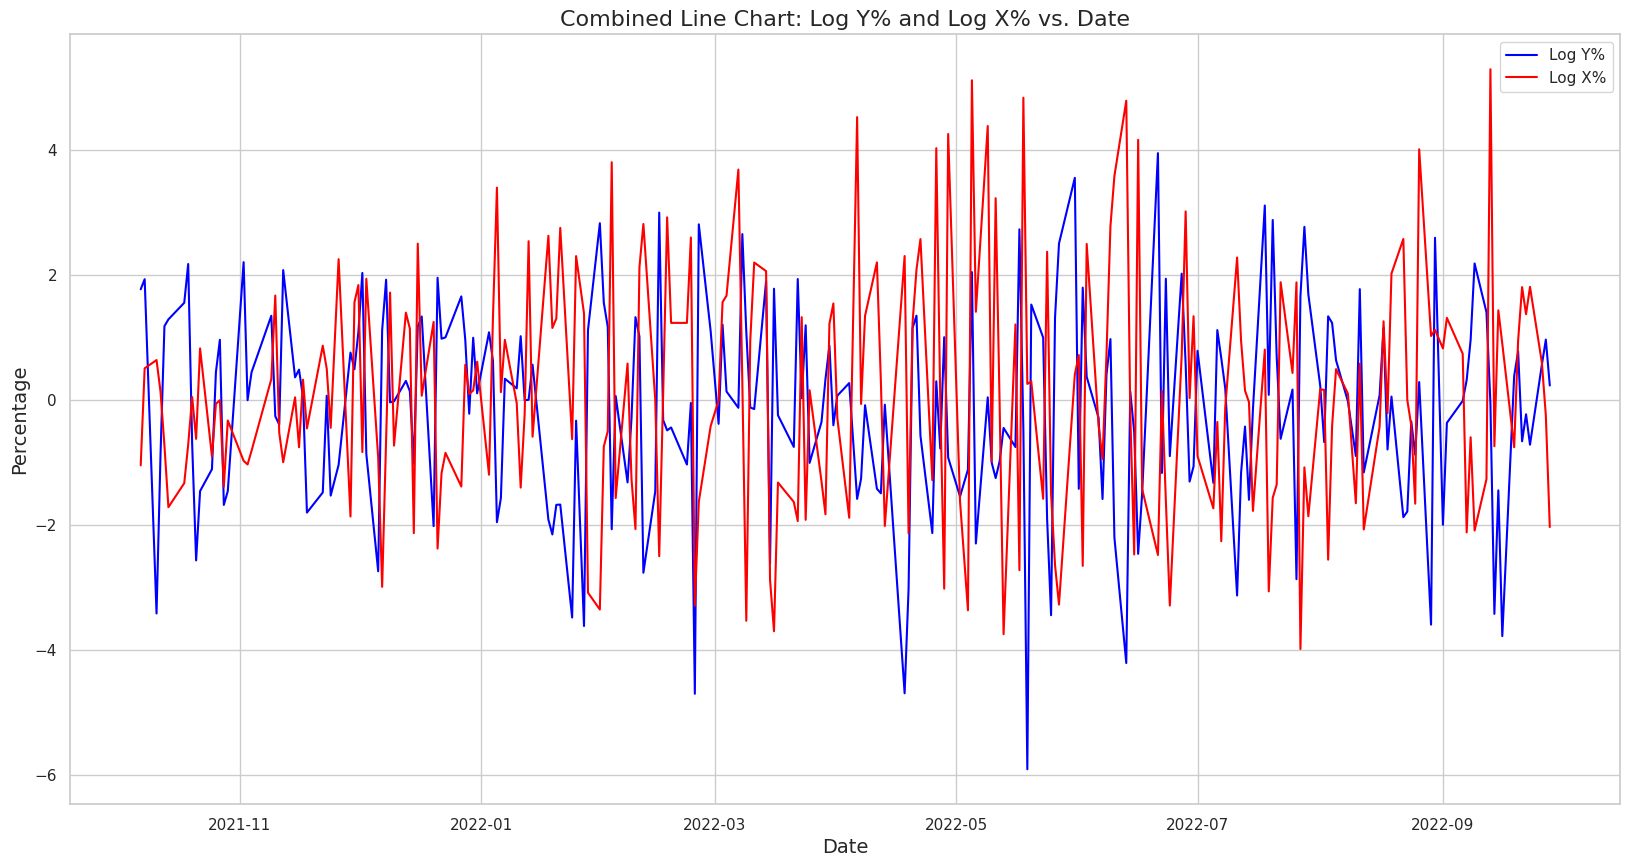

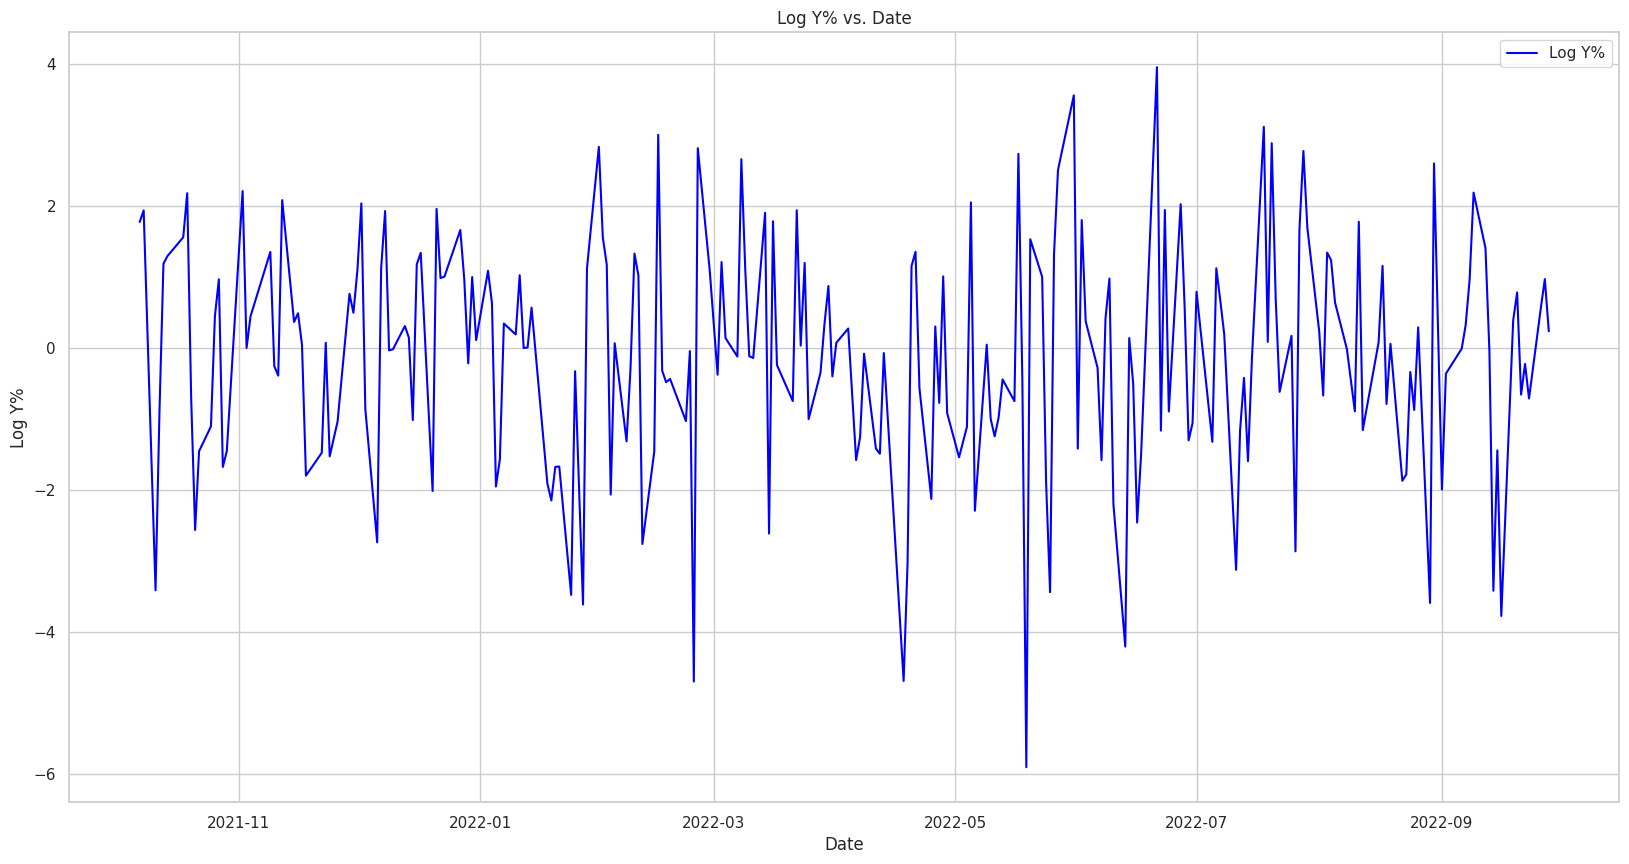

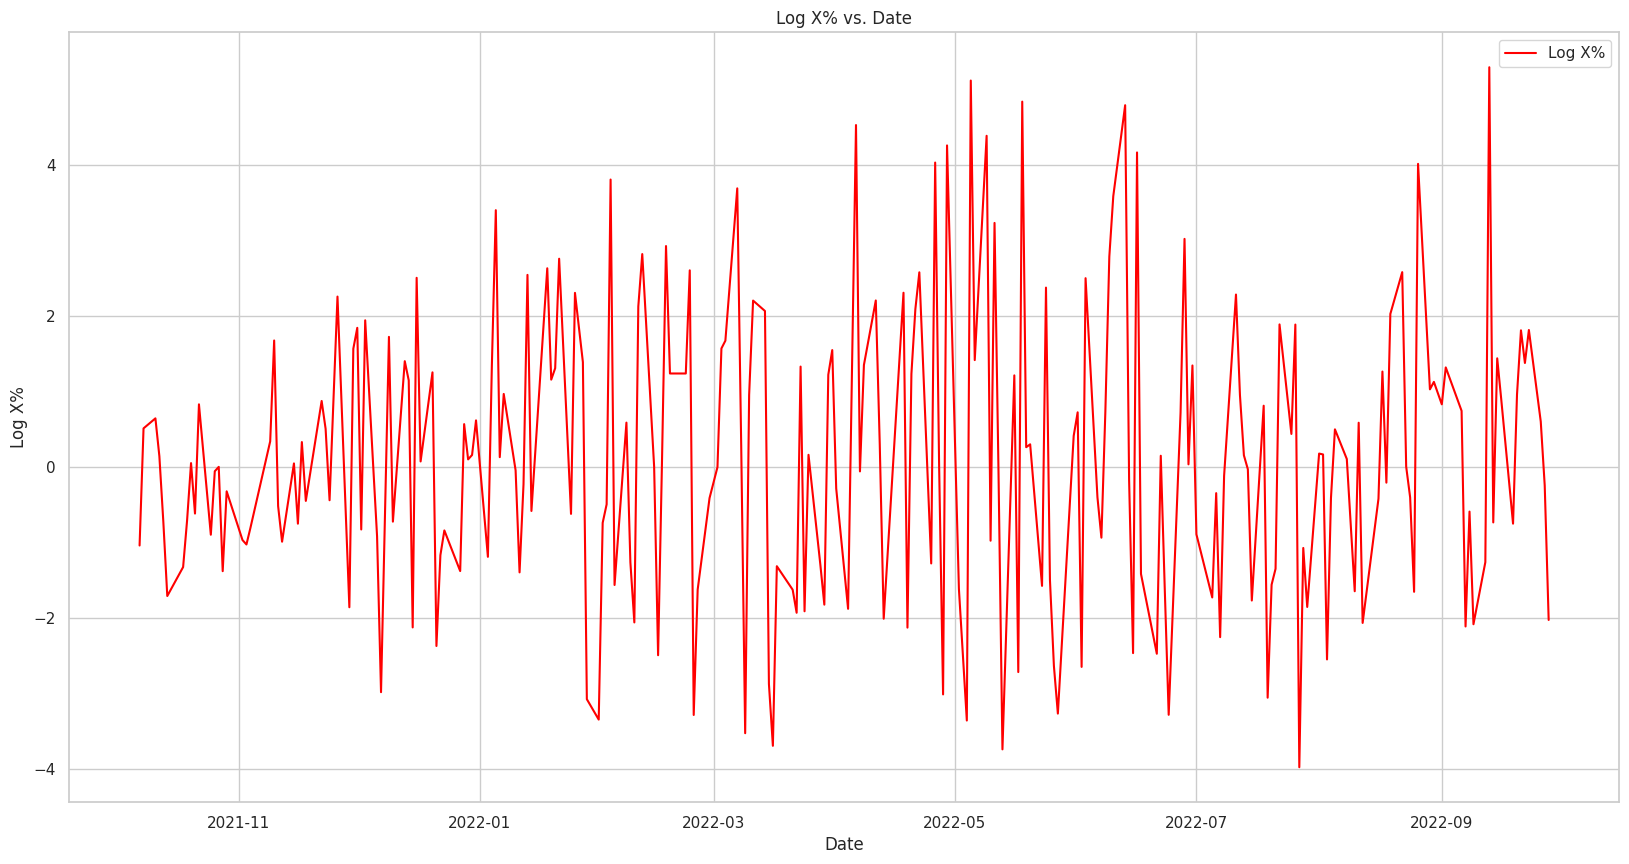

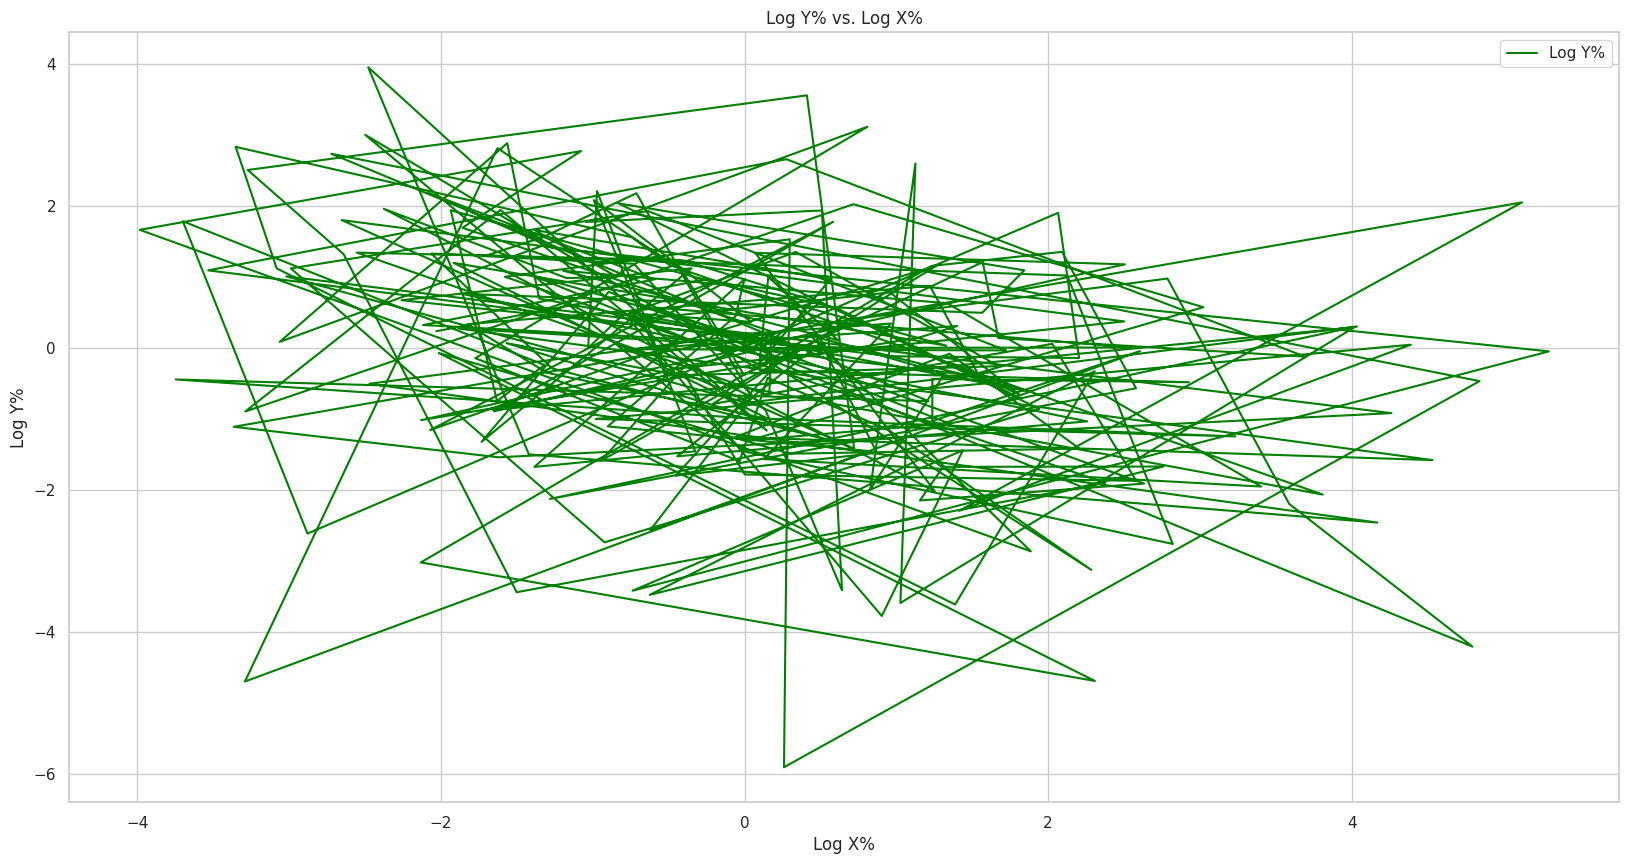

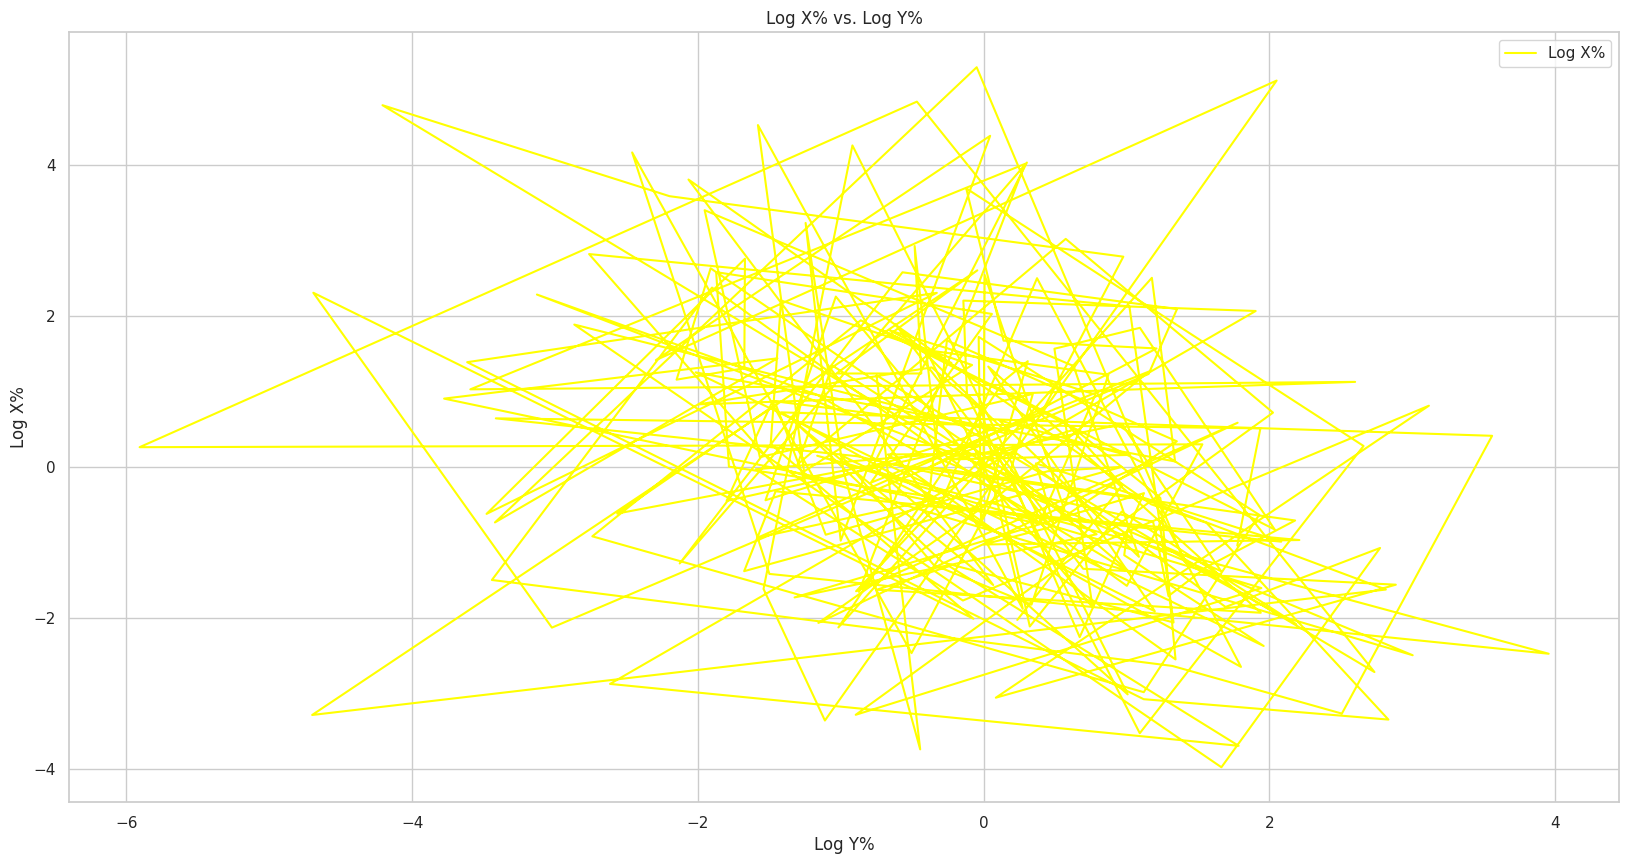

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Excel file and specify the sheet name
try:
    df = pd.read_excel('Data 1.xlsx', sheet_name='Log')  # Update sheet name as required
except FileNotFoundError:
    print("Error: 'Data 2.xlsx' not found. Please upload the correct file.")
    exit()

# Check if the required columns exist in the DataFrame
required_cols = ['Date', 'Log Y%', 'Log X%']
if not all(col in df.columns for col in required_cols):
    print("Error: The DataFrame does not contain all the required columns ('Date', 'Log Y%', 'Log X%'). Please check your Excel file.")
    exit()

# Convert 'Date' column to datetime format for better plotting
df['Date'] = pd.to_datetime(df['Date'])

# Plot three line charts combined into one graph
plt.figure(figsize=(20, 10))
sns.set(style="whitegrid")

# Log Y% vs Date
sns.lineplot(data=df, x='Date', y='Log Y%', label='Log Y%', color='blue')

# Log X% vs Date
sns.lineplot(data=df, x='Date', y='Log X%', label='Log X%', color='red')

# Add more lines if needed
# Example: sns.lineplot(...)

# Set labels and title
plt.title('Combined Line Chart: Log Y% and Log X% vs. Date', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Percentage', fontsize=14)
plt.legend()
plt.grid(True)

# Show the combined graph
plt.show()
plt.figure(figsize=(20, 10))
plt.plot(df['Date'], df['Log Y%'], label='Log Y%', color='blue')
plt.xlabel('Date')
plt.ylabel('Log Y%')
plt.title('Log Y% vs. Date')
plt.legend()
plt.grid(True)

plt.show()

plt.show()
plt.figure(figsize=(20, 10))
plt.plot(df['Date'], df['Log X%'], label='Log X%', color='red')
plt.xlabel('Date')
plt.ylabel('Log X%')
plt.title('Log X% vs. Date')
plt.legend()
plt.grid(True)

plt.show()
plt.show()
plt.figure(figsize=(20, 10))
plt.plot(df['Log X%'], df['Log Y%'], label='Log Y%', color='green')
plt.xlabel('Log X%')
plt.ylabel('Log Y%')
plt.title('Log Y% vs. Log X%')
plt.legend()
plt.grid(True)

plt.show()

plt.show()
plt.figure(figsize=(20, 10))
plt.plot(df['Log Y%'], df['Log X%'], label='Log X%', color='yellow')
plt.xlabel('Log Y%')
plt.ylabel('Log X%')
plt.title('Log X% vs. Log Y%')
plt.legend()
plt.grid(True)